# Import các thư viện cần thiết

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams

# Thu thập dữ liệu

- Dữ liệu nhóm thu thập về chủ đề âm nhạc cụ thể là các bài hát hàng đầu trên Spotify từ 2010-2019 và được tính theo năm. Tập dữ liệu này có một số biến về các bài hát và dựa trên Billboard. Dữ liệu được nhóm lấy từ trang Kaggle ([link data](https://www.kaggle.com/leonardopena/top-spotify-songs-from-20102019-by-year)).
- Ở mục `Metadata` thì Visibility là Public nên ta có thể sử dụng dữ liệu này để  phục vụ cho mục đích học tập.
- Dữ liệu được người ta lấy từ lấy từ: http://organizeyourmusic.playlistmachinery.com/. Các bước lấy dữ liệu được hướng dẫn chi tiết [ở đây](https://www.youtube.com/watch?v=NGY1cthhr5g&ab_channel=PaulLamere). Người thu thập dữ liệu đã bỏ đi 2 cột không cần thiết ở tập dữ liệu gốc.

# Khám phá dữ liệu

## Đọc dữ liệu từ file csv vào dataframe

In [2]:
top_songs_df = pd.read_csv('Data/top10s.csv', index_col="Unnamed: 0")
top_songs_df.head()

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


## Dữ liệu có bao nhiêu dòng và bao nhiêu cột?

In [3]:
top_songs_df.shape

(603, 14)

Dữ liệu có 603 dòng và 14 cột

## Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

Theo mô tả của dữ liệu và quan sát sơ về dữ liệu thì mỗi dòng cho biết thông tin của một bài hát hàng đầu trên Spotify

Có vẻ không có vấn đề các dòng có ý nghĩa khác nhau

## Dữ liệu có các dòng bị lặp không?

In [4]:
top_songs_df.duplicated().sum()

0

Dữ liệu không có các dòng bị lặp

## Mỗi cột có ý nghĩa gì?

Dưới đây là phần mô tả dữ liệu:
1. **title**: Song's title
2. **artist**: Song's artist
3. **top genre**: The genre of the track
4. **year**: The release year of the recording. Note that due to vagaries of releases, re-releases, re-issues and general madness, sometimes the release years are not what you'd expect.
5. **bpm**: The tempo of the song.
6. **nrgy**: The energy of a song - the higher the value, the more energtic song.
7. **dnce**: The higher the value, the easier it is to dance to this song.
8. **dB**: The higher the value, the louder the song.
9. **live**: The higher the value, the more likely the song is a live recording.
10. **val**: The higher the value, the more positive mood for the song.
11. **dur**: The duration of the song.
12. **acous**: The higher the value the more acoustic the song is.
13. **spch**: The higher the value the more spoken word the song contains.
14. **pop**: The higher the value the more popular the song is.

## Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không?

In [5]:
top_songs_df.dtypes

title        object
artist       object
top genre    object
year          int64
bpm           int64
nrgy          int64
dnce          int64
dB            int64
live          int64
val           int64
dur           int64
acous         int64
spch          int64
pop           int64
dtype: object

Có hai loại kiểu dữ liệu, đó là:

- Categorical
- Numerical

Ta thấy các cột đã có kiểu dữ liệu phù hợp nên không cần xửa lý gì cả.

## Với mỗi cột có kiểu dữ liệu dạng số (numeric), các giá trị được phân bố như thế nào?

In [6]:
def missing_ratio(s):
    return s.isna().mean() * 100
num_col = top_songs_df.select_dtypes(np.int64).columns
top_songs_df[num_col].agg([missing_ratio, min, max])

,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
missing_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,2010.0,0.0,0.0,0.0,-60.0,0.0,0.0,134.0,0.0,0.0,0.0
max,2019.0,206.0,98.0,97.0,-2.0,74.0,98.0,424.0,99.0,48.0,99.0


Min và max của các cột không có gì bất thường.

## Với mỗi cột có kiểu dữ liệu dạng phân loại (categorical), các giá trị được phân bố như thế nào?

In [7]:
cate_col = set(top_songs_df.columns) - set(num_col)
top_songs_df[cate_col].agg([missing_ratio, pd.Series.nunique, pd.Series.unique])\
                      .rename(index={'nunique': 'num_diff_vals', 'unique':'diff_vals'})

,top genre,artist,title
missing_ratio,0.0,0.0,0.0
num_diff_vals,50,184,584
diff_vals,"[neo mellow, detroit hip hop, dance pop, pop, ...","[Train, Eminem, Kesha, Lady Gaga, Bruno Mars, ...","[Hey, Soul Sister, Love The Way You Lie, TiK T..."


# Đưa ra các câu hỏi có ý nghĩa cần trả lời

Sau khi đã khám phá dữ liệu và hiểu hơn về dữ liệu, ta thấy có một số câu hỏi có thể được trả lời bằng dữ liệu:

- Câu hỏi 1: Chỉ số phổ biến của mỗi thể loại âm nhạc thay đổi như thế nào qua các năm?
    
    Ý nghĩa: Tác giả sẽ thấy được xu hướng thể loại âm nhạc để lựa chọn thể loại phù hợp cho việc sáng tác.
    
    
- Câu hỏi 2: Đặc điểm phổ biến các biến của bài hát như thế nào qua các năm? 

    Ý nghĩa: Khi trả lời được câu hỏi này thì tác giả dựa trên các đặc điểm phổ biến đó sẽ nắm bắt xu hướng của thị trường âm nhạc, nên có lợi thế sáng tác được những bài hát phù hợp với thị trường, người nghe nhiều hơn. Hoặc tác giả có thể sáng tác bài hát có đặc điểm khác biệt nếu được người nghe ủng hộ thì từ đó tạo ra bước chạy đà cho một xu hướng âm nhạc mới.

# Tiền xử lý + phân tích dữ liệu để trả lời cho từng câu hỏi

## Chỉ số phổ biến của mỗi thể loại âm nhạc thay đổi như thế nào qua các năm?

### Tiền xử lý

Để đánh giá tiềm năng của mỗi thể loại nhạc, ta sẽ tiến hành tính trung bình chỉ số pop để xem với từng thể loại thì mức độ phổ biến của nó như thế nào.

In [8]:
mean_df = top_songs_df[['top genre', 'pop']].groupby(['top genre'])['pop'].mean().reset_index(name = 'mean')
mean_df.head()

,top genre,mean
0,acoustic pop,58.50
1,alaska indie,36.00
2,alternative r&b,84.00
3,art pop,62.75
4,atl hip hop,50.00


Tiếp theo ta xem top 5 thể loại có độ phổ biến trung bình cao nhất.

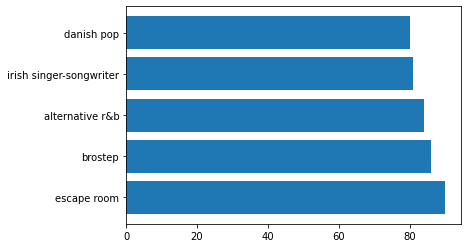

In [9]:
top_mean_df = mean_df.sort_values(by = 'mean', ascending = False)[:5]
plt.barh(top_mean_df['top genre'], top_mean_df['mean']);

Ta thấy rằng top 5 thể loại có độ phổ biến cao nhất lần lượt là Escape room, Brostep, Alternative R&B, Irish Singer-Songwriter và Danish Pop. Tiếp theo ta sẽ dựa trên các thể loại này để xem độ phổ biến của các thể loại này thay đổi thế nào qua các năm.

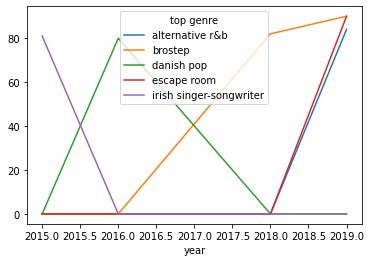

In [10]:
temp = top_songs_df[['year', 'top genre', 'pop']].groupby(['year', 'top genre'])['pop'].mean().reset_index(name = 'mean')
temp[temp['top genre'].isin(top_mean_df['top genre'])].pivot(index = 'year', columns = 'top genre', values = 'mean').fillna(0).plot.line();

Dựa vào hình vẽ trên, ta thấy rằng Escape room và Alternative R&B là hai thể loại mới vào bảng xếp hạng của năm 2019 với điểm phổ biến khá cao nên đây có thể sẽ là thể loại tiềm năng trong các năm tiếp theo. Bên cạnh đó thể loại Brostep là thể loại đã bẳt đầu tham gia bảng xếp hạng năm 2017 và điểm phổ biến đang tăng lên rất cao nên đây có thể là xu hướng âm nhạc hiện tại.

Nhưng để có cái nhìn khách quan hơn thì ta sẽ xét thêm các thể loại có số lượng bài hát lọt top nhiều nhất.

In [11]:
top_count_df = top_songs_df['top genre'].value_counts()[:5]
top_count_df['others'] = top_songs_df['top genre'].value_counts()[5:].sum()
top_count_df

dance pop        327
pop               60
canadian pop      34
barbadian pop     15
boy band          15
others           152
Name: top genre, dtype: int64

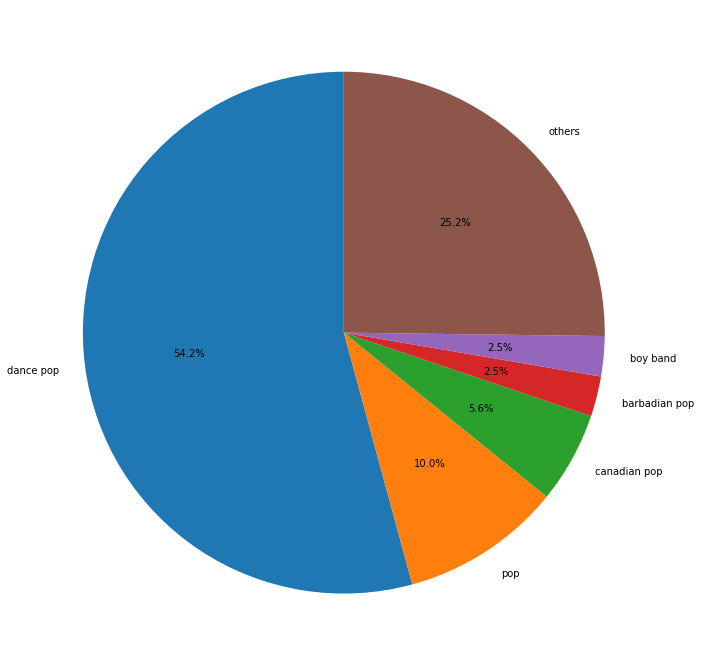

In [12]:
rcParams['figure.figsize'] =12,12
plt.pie(top_count_df, labels = top_count_df.index, autopct = '%1.1f%%', startangle = 90);

Ta có thể dễ dàng thấy Dance pop là thể loại dễ để lọt top nhất với tỉ lệ chiếm top là 54.2%, tiếp theo đó là pop với 10%, Canadian Pop với 5.6%, Boy band với 2.5% và Barbadian Pop với 2.5%. Tiếp theo ta sẽ xét điểm phổ biến trung bình của các thể loại này ở các năm.

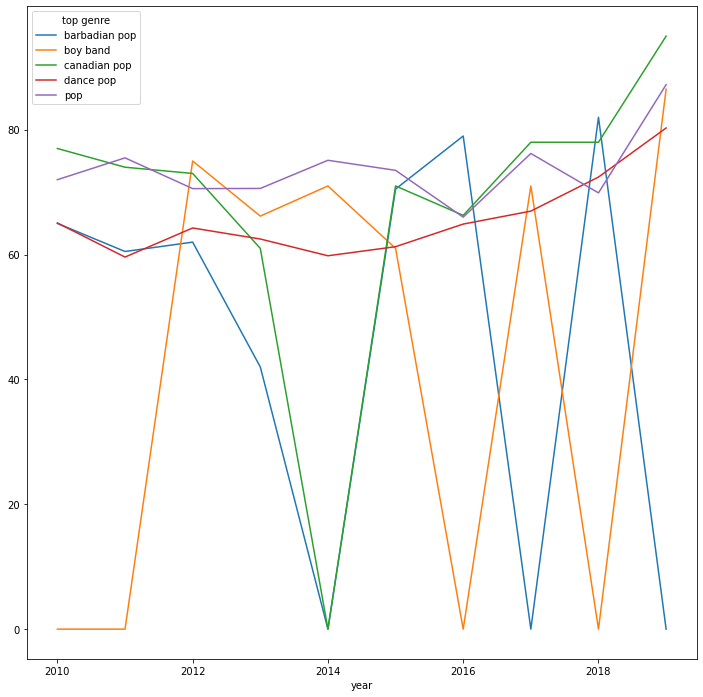

In [13]:
temp[temp['top genre'].isin(top_count_df.index)].pivot(index = 'year', columns = 'top genre', values = 'mean').fillna(0).plot.line();

Ta thấy rằng với Barbadian Pop, Boy band, Canadian Pop thì dù có những thời gian đạt điểm phổ biến rất cao nhưng lại không ổn định, nhưng với Canadian Pop thì dù không có bài hát nào cùng thể loại lọt top năm 2014 nhưng ở những năm tiếp theo thì thể loại này lại tiếp tục tiến vào bảng xếp hạng và điểm phổ biến đạt đến mức rất cao. Đây có thể là dấu hiệu cho thấy thể loại này đang trở thành xu hướng âm nhạc hiện tại.
Còn với Pop và Dance Pop thì dù điểm phổ biến trung bình không cao bằng Canadian Pop nhưng hai thể loại này lại rất ổn định trên bảng xếp hạng, ở hai thể loại này luôn có bài hát tham gia vào bảng xếp hạng. Đây sẽ là hai thể loại tốt để chọn lựa nếu muốn bám theo xu hướng âm nhạc từ trước đến nay.

# Nhìn lại quá trình làm đồ án

## Khó khăn:
- Gặp khó khăn trong việc chọn cách thể hiện kết quả thu thập được.
- Những điều học được:
    - Kỹ năng làm việc nhóm.
    - Làm việc bằng Github

# Tài liệu tham khảo